# The Latin American Agriculture Sector as Related With a Country's Macroeconomy

## Daniel Fridman (df1647) and Samantha Ruilova Vallejo (srv261)

21 December 2018

## Outline:

The World Bank has an immense compendium of economic data for over 300 nations, regions, and disputed states. There's a lot to be done with such data, and economists, data scientists, and hedge funds comb through the over 26,000,000 pieces of data. We have decided to join them in their pursuits.

This project analyzes the agricultural industry of thirty two countries in Latin America. Agriculture is of great importance to the economy overall. Especially in developing countries, agriculture has a strategic impotance in social and economic welfare. Oftentimes, the sector can contribute up to fifty percent to Gross National Income. However, the agricultural sector is often not given enough analytical attention. Thus, we decided to analyze this sector by assesing the relevant macroeconomic trends and country-specific factors that affect this industry across the region.

Specifically, we aim to evaluate any potential correlations between pure macroeconomic factors, such as interest rates, and agricultural indicators, such as percentage velue added. We start by finding these correlations on a country-level basis (e.g. what's the correlation between interest rates and value added in Antigua and Barbuda?), and then generalize our programming to be able to find the average of all correlation pairs in all countries. We will thus be able to compare all correlations at once, instead of fishing blindly for factors we believe *might* be correlated.

Generalization is a big theme here. The World Bank has so much data, and we aimed to create a program that doesn't just work for LatAm, or macro indicators, or agricultural indicators. We seek scalability, so that adding another country or another indicator constitututes nothing more than changing a couple of lines.

The effect of this is that we avoided hardcoding like the plague, and thus have *lots* of seemingly complicated lines of code. We tried to explain these as best as possible. Overall, we have less lines of code than comparable projects due to a liberal usage of loops. Most of our time spent on this project regarded figuring out the logic behind the methods. 

### Let's start off with some simple imports and definitions

In [2361]:
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
import math as math
from scipy.stats.stats import pearsonr

%matplotlib inline

Import WDI data as dataframe:

In [2362]:
file = '/Users/danielfridman/Downloads/WDI_csv/WDIData.csv'
WDI = pd.read_csv(file)

Create dictionary of countries/keys and convert to dataframe. *Note: We have not included Venezuela due to lack of data.*

In [2363]:
countries_dict = {
    'country': {1: 'Antigua and Barbuda',
                2: 'Argentina',
                3: 'Bahamas',
                4: 'Barbados',
                5: 'Belize',
                6: 'Bolivia',
                7: 'Brazil',
                8: 'Chile',
                9: 'Colombia',
                10: 'Costa Rica',
                11: 'Cuba',
                12: 'Dominica',
                13: 'Dominican Republic',
                14: 'Ecuador',
                15: 'El Salvador',
                16: 'Grenada',
                17: 'Guatemala',
                18: 'Guyana',
                19: 'Haiti',
                20: 'Honduras',
                21: 'Jamaica',
                22: 'Mexico',
                23: 'Nicaragua',
                24: 'Panama',
                25: 'Paraguay',
                26: 'Peru',
                27: 'Saint Kitts & Nevis',
                28: 'Saint Lucia',
                29: 'Saint Vincent & Grenadines',
                30: 'Suriname',
                31: 'Trinidad and Tobago',
                32: 'Uruguay',
               },
    'code': {1: 'ATG', 2: 'ARG', 3: 'BHS', 4: 'BRB', 5: 'BLZ', 6: 'BOL', 7: 'BRA', 8: 'CHL', 9: 'COL', 10: 'CRI', 
             11: 'CUB', 12: 'DMA', 13: 'DOM', 14: 'ECU', 15: 'SLV', 16: 'GRD', 17: 'GTM', 18: 'GUY', 19: 'HTI',
             20: 'HND', 21: 'JAM', 22: 'MEX', 23: 'NIC', 24: 'PAN', 25: 'PRY', 26: 'PER', 27: 'KNA', 28: 'LCA',
             29: 'VCT', 30: 'SUR', 31: 'TTO', 32: 'URY'
            }
}
countries = pd.DataFrame(countries_dict)

Select relevant indicators:

In [2364]:
indicators_macro = {
              'NY.GNP.PCAP.CD':'GNI per Capita', 
              'NY.GDP.MKTP.KD.ZG':'GDP Growth (%)',
              'BX.KLT.DINV.CD.WD': 'Foreign direct investment, net inflows (BoP, current US$)',
              'FP.CPI.TOTL.ZG': 'Inflation, consumer prices (annual %)',
              'FR.INR.RINR': 'Real interest rate (%)',
              'SM.POP.NETM': 'Net migration',
              'PA.NUS.FCRF': 'Official exchange rate (LCU per US$, period average)',
              'SL.UEM.TOTL.ZS': 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
              'IC.PRP.PROC': 'Procedures to register property (number)',
              'FR.INR.RISK': 'Risk premium on lending (lending rate minus treasury bill rate, %)',
             }

indicators_agro = { 'NV.AGR.TOTL.ZS' : 'Agriculture, forestry, and fishing, value added (% of GDP)',
                    'NV.AGR.TOTL.KD.ZG' : 'Agriculture, forestry, and fishing, value added (annual % growth)',
                    'NV.AGR.TOTL.KD' : 'Agriculture, forestry, and fishing, value added (constant 2010 US$)',
                    'NV.AGR.TOTL.KN' : 'Agriculture, forestry, and fishing, value added (constant LCU)',
                    'NV.AGR.TOTL.CN' : 'Agriculture, forestry, and fishing, value added (current LCU)',
                    'NV.AGR.TOTL.CD' : 'Agriculture, forestry, and fishing, value added (current US$)',
                    'NV.AGR.EMPL.KD' : 'Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)',
                    'ER.H2O.FWAG.ZS' : 'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
                    'SL.AGR.0714.ZS' : 'Child employment in agriculture (% of economically active children ages 7-14)',
                    'SL.AGR.0714.FE.ZS' : 'Child employment in agriculture, female (% of female economically active children ages 7-14)',
                    'SL.AGR.0714.MA.ZS' : 'Child employment in agriculture, male (% of male economically active children ages 7-14)',
                    'SL.AGR.EMPL.ZS' : 'Employment in agriculture (% of total employment) (modeled ILO estimate)',
                    'SL.AGR.EMPL.FE.ZS' : 'Employment in agriculture, female (% of female employment) (modeled ILO estimate)',
                    'SL.AGR.EMPL.MA.ZS' : 'Employment in agriculture, male (% of female employment) (modeled ILO estimate)',
}

### Now let's take a look at our data and clean it up a bit

In [2365]:
WDI.tail(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
422390,Zimbabwe,ZWE,Women participating in the three decisions (ow...,SG.DMK.ALLD.FN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,74.5,NaN,NaN,NaN,72.1,NaN,NaN,NaN
422391,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REAS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,39.6,NaN,NaN,37.4,38.7,NaN,NaN,NaN
422392,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.6,NaN,NaN,NaN,16.7,NaN,NaN,NaN
422393,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.BURN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7.5,NaN,NaN,NaN,8.1,NaN,NaN,NaN
422394,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.GOES.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,22.3,NaN,NaN,NaN,22.8,NaN,NaN,NaN
422395,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.NEGL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.4,NaN,NaN,NaN,21.4,NaN,NaN,NaN
422396,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.9,NaN,NaN,NaN,14.5,NaN,NaN,NaN
422397,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN,NaN,NaN
422398,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,30.1,NaN,30.5,NaN,NaN,33.5,32.4,NaN,NaN,NaN
422399,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,57.4,58.2,58.4,58.6,58.8,58.9,58.9,59.0,59.1,NaN


In [2366]:
WDI.shape

(422400, 63)

In [2367]:
WDI.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
1961              float64
1962              float64
1963              float64
1964              float64
1965              float64
1966              float64
1967              float64
1968              float64
1969              float64
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
                   ...   
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996        

Set all columns lowercase, set index as country code, drop any unsorted columns, and remove all rows with less than 10 non-NaN values for more reliable data

In [2368]:
WDI.columns = [i.lower() for i in WDI.columns]
WDI = WDI.set_index('country code')
WDI = WDI.drop('unnamed: 62', 1)
WDI = WDI.dropna(how = 'all', subset = [[str(i) for i in list(range(1960, 2018, 1))]], thresh = 10) #removes all rows with less than 10 non-NaN values

In [2369]:
WDI.shape

(225787, 61)

Looks like we got rid of 150,000 lines!

### Now let's create our LatAm dataframe from the list of countries we created a dictionary of earlier – this is the only part that is *not* scalable, e.g. if we were to create a WDI_Europe DataFrame, we'd have to change some of the code.

### It's possible to get around this by adding countries to countries_dict, instead of creating a separate dictionary for different countries.

In [2370]:
WDI_LatAm = WDI.loc[(WDI['country name'].isin(countries['country'])),:]
WDI_LatAm.shape

(28953, 61)

In [2371]:
WDI_LatAm_Macro = WDI_LatAm.loc[(WDI_LatAm['indicator code'].isin(list(indicators_macro))),:]
WDI_LatAm_Macro = WDI_LatAm_Macro.reset_index()
WDI_LatAm_Macro.shape

(250, 62)

In [2372]:
WDI_LatAm_Agro = WDI_LatAm.loc[(WDI_LatAm['indicator code'].isin(list(indicators_agro))),:]
WDI_LatAm_Agro = WDI_LatAm_Agro.reset_index()
WDI_LatAm_Agro.shape

(268, 62)

### And now, from the LatAm dataframe, let's create a sample country dataframe – obviously not scalable, but for now. Our first country is Antigua and Barbuda, so let's check out its Macroeconomic indicators!

In [2373]:
WDI_LatAm_Macro_ATG = WDI_LatAm_Macro.loc[(WDI_LatAm_Macro['country code'] == 'ATG')][[str(i) for i in list(range(1960, 2018, 1))]]
WDI_LatAm_Macro_ATG

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.587838e+08,8.064665e+07,9.667921e+07,6.516060e+07,1.293671e+08,1.342890e+08,4.302257e+07,9.626780e+07,4.893718e+07,6.088765e+07
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.013327e-02,-1.210754e+01,-7.200024e+00,-2.079127e+00,3.506609e+00,-1.039391e-01,5.101940e+00,4.060219e+00,5.342479e+00,3.337049e+00
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.407000e+04,1.257000e+04,1.180000e+04,1.152000e+04,1.190000e+04,1.202000e+04,1.250000e+04,1.285000e+04,1.356000e+04,1.417000e+04
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.333806e+00,-5.501600e-01,3.370025e+00,3.456750e+00,3.376880e+00,1.059498e+00,1.089442e+00,9.689935e-01,-4.894378e-01,2.432488e+00
4,NaN,NaN,-1703.00000,NaN,NaN,NaN,NaN,-1625.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,-5.600000e+01,NaN,NaN,NaN,NaN,-5.600000e+01
5,1.71429,1.71429,1.71429,1.71429,1.71429,1.71429,1.71429,1.761908,2.0,2.0,...,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000e+00,6.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.795052e+00,8.131960e+00,9.423395e+00,9.599928e+00,7.490880e+00,1.154019e+01,7.806522e+00,7.199301e+00,7.896707e+00,7.631749e+00
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.414101e+00,3.690370e+00,4.749348e+00,4.414453e+00,4.032197e+00,3.952353e+00,4.071838e+00,4.840083e+00,4.963333e+00,6.645000e+00


Clean it up a bit and set an index...

In [2374]:
WDI_LatAm_Macro_ATG['indicator code'] = list(WDI_LatAm_Macro.loc[(WDI_LatAm_Macro['country code'] == 'ATG')]['indicator code'])
WDI_LatAm_Macro_ATG = WDI_LatAm_Macro_ATG.set_index('indicator code')
WDI_LatAm_Macro_ATG

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
indicator code,,,,,,,,,,,,,,,,,,,,,
BX.KLT.DINV.CD.WD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.587838e+08,8.064665e+07,9.667921e+07,6.516060e+07,1.293671e+08,1.342890e+08,4.302257e+07,9.626780e+07,4.893718e+07,6.088765e+07
NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.013327e-02,-1.210754e+01,-7.200024e+00,-2.079127e+00,3.506609e+00,-1.039391e-01,5.101940e+00,4.060219e+00,5.342479e+00,3.337049e+00
NY.GNP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.407000e+04,1.257000e+04,1.180000e+04,1.152000e+04,1.190000e+04,1.202000e+04,1.250000e+04,1.285000e+04,1.356000e+04,1.417000e+04
FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.333806e+00,-5.501600e-01,3.370025e+00,3.456750e+00,3.376880e+00,1.059498e+00,1.089442e+00,9.689935e-01,-4.894378e-01,2.432488e+00
SM.POP.NETM,NaN,NaN,-1703.00000,NaN,NaN,NaN,NaN,-1625.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,-5.600000e+01,NaN,NaN,NaN,NaN,-5.600000e+01
PA.NUS.FCRF,1.71429,1.71429,1.71429,1.71429,1.71429,1.71429,1.71429,1.761908,2.0,2.0,...,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00,2.700000e+00
IC.PRP.PROC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000e+00,6.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
FR.INR.RINR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.795052e+00,8.131960e+00,9.423395e+00,9.599928e+00,7.490880e+00,1.154019e+01,7.806522e+00,7.199301e+00,7.896707e+00,7.631749e+00
FR.INR.RISK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.414101e+00,3.690370e+00,4.749348e+00,4.414453e+00,4.032197e+00,3.952353e+00,4.071838e+00,4.840083e+00,4.963333e+00,6.645000e+00


Now let's plot the data!

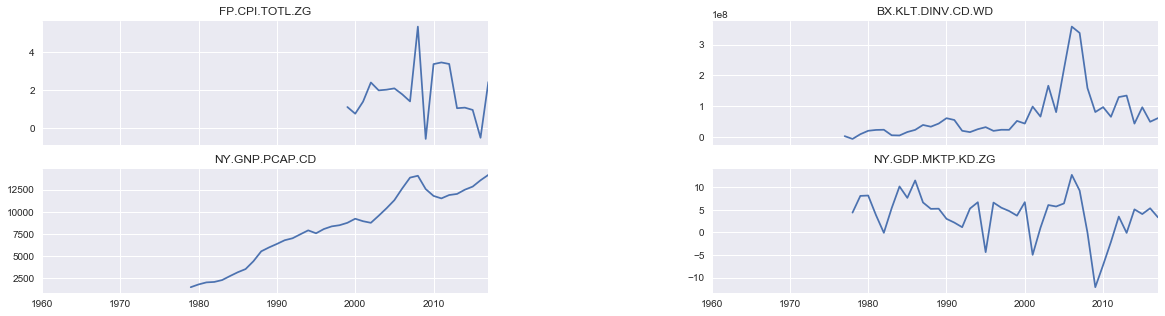

In [2375]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True)
fig.subplots_adjust(wspace = 0.5)

WDI_LatAm_Macro_ATG.T[WDI_LatAm_Macro_ATG.T.columns[0]].plot(ax = ax[0, 1], title = WDI_LatAm_Macro_ATG.T.columns[0], figsize = (20, 5))
WDI_LatAm_Macro_ATG.T[WDI_LatAm_Macro_ATG.T.columns[1]].plot(ax = ax[1, 1], title = WDI_LatAm_Macro_ATG.T.columns[1])
WDI_LatAm_Macro_ATG.T[WDI_LatAm_Macro_ATG.T.columns[2]].plot(ax = ax[1, 0], title = WDI_LatAm_Macro_ATG.T.columns[2])
WDI_LatAm_Macro_ATG.T[WDI_LatAm_Macro_ATG.T.columns[3]].plot(ax = ax[0, 0], title = WDI_LatAm_Macro_ATG.T.columns[3])

It's taking too long to do all the graphs one by one...why not automate it with a loop?
#### We will be using this logic throughout the project.
This is also not scalable due to hardcoding the number of indicators (nrows * ncols) and due to the title. We leave it as is since it only exists for demonstration purposes.

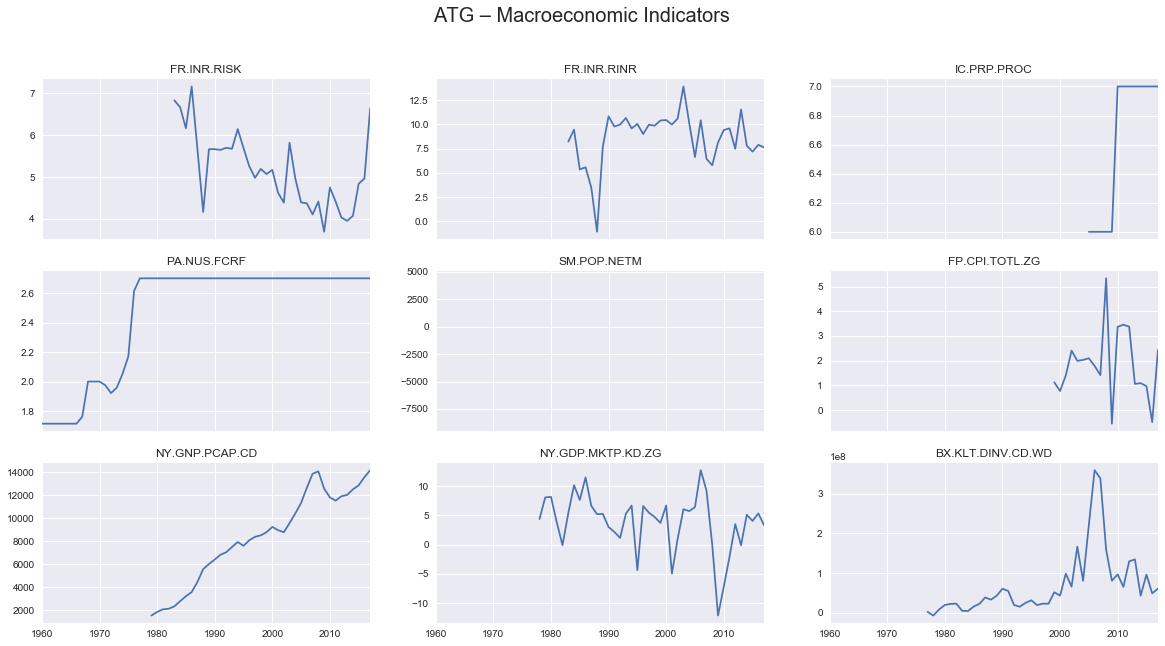

In [2376]:
ncols = len(WDI_LatAm_Macro_ATG.index) - 1

fig, ax = plt.subplots(nrows = 3, ncols = 3, sharex = True)

while ncols > -1:
    
    for i in range(3):
        for j in range(3):
            WDI_LatAm_Macro_ATG.T[WDI_LatAm_Macro_ATG.T.columns[ncols]].plot(ax = ax[i, j], title = WDI_LatAm_Macro_ATG.T.columns[ncols], figsize = (20, 5))
            ncols-=1
    
fig.set_figwidth(20)
fig.set_figheight(10)
fig = fig.suptitle('ATG – Macroeconomic Indicators', fontsize = 20)

Interesting! A couple of conclusions:

– SM.POP.NETM seems to not exist, but looking up the dataframe shows that there's only a value every five years. Perhaps that is messing with it.

– FR.INR.RISK and FR.INR.RINR seem to be directly correlated. This is not a surprise since .RISR is the risk-free rate, while .RISK is the risk-free rate.

– PA.NUS.FCRF evens out. This is the exchange rate. Antigua and Barbuda fixed its currency to the dollar in 1976, so reliability is not compromised.

– Rest of the data has at least 20 datapoints – looking good!

### Same thing for the Agricultural indicators...

In [2377]:
WDI_LatAm_Agro_ATG['indicator code'] = list(WDI_LatAm_Agro.loc[(WDI_LatAm_Agro['country code'] == 'ATG')]['indicator code'])
WDI_LatAm_Agro_ATG = WDI_LatAm_Agro_ATG.set_index('indicator code')
WDI_LatAm_Agro_ATG

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
indicator code,,,,,,,,,,,,,,,,,,,,,
NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.549311e+00,1.496707e+00,1.627626e+00,1.925529e+00,1.880879e+00,1.998157e+00,1.570678e+00,1.674554e+00,1.642377e+00,1.630647e+00
NV.AGR.TOTL.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-6.868142e+00,-1.405730e+01,1.690925e+00,1.355462e+01,2.435677e+00,5.548525e+00,-1.603148e+01,1.266845e+01,4.088392e+00,1.378129e+00
NV.AGR.TOTL.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.146312e+07,1.844598e+07,1.875789e+07,2.130045e+07,2.181926e+07,2.302991e+07,1.933787e+07,2.178768e+07,2.267845e+07,2.299099e+07
NV.AGR.TOTL.KN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.764570e+07,4.094800e+07,4.164040e+07,4.728460e+07,4.843630e+07,5.112380e+07,4.292790e+07,4.836620e+07,5.034360e+07,5.103740e+07
NV.AGR.TOTL.CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.724340e+07,4.947340e+07,5.064630e+07,5.937400e+07,6.152000e+07,6.435860e+07,5.428830e+07,6.170950e+07,6.474890e+07,6.746760e+07
NV.AGR.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.120126e+07,1.832348e+07,1.875789e+07,2.199037e+07,2.278519e+07,2.383652e+07,2.010678e+07,2.285537e+07,2.398107e+07,2.498800e+07


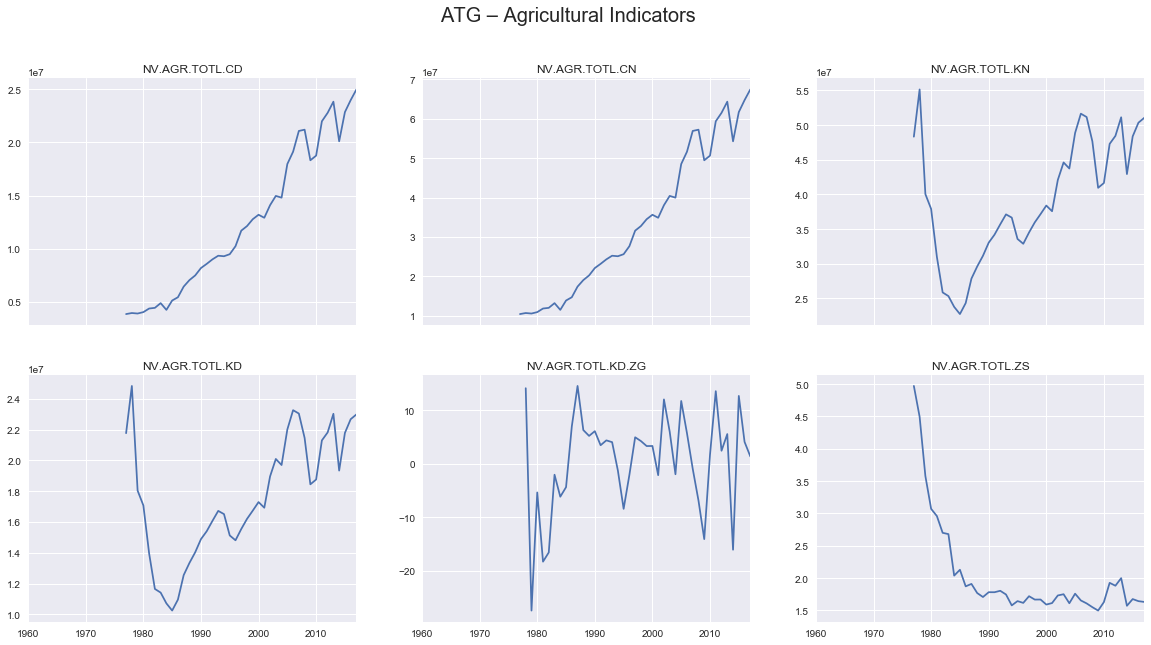

In [2378]:
ncols = len(WDI_LatAm_Agro_ATG.index) - 1

fig, ax = plt.subplots(nrows = 2, ncols = 3, sharex = True)

while ncols > -1:
    
    for i in range(2):
        for j in range(3):
            WDI_LatAm_Agro_ATG.T[WDI_LatAm_Agro_ATG.T.columns[ncols]].plot(ax = ax[i, j], title = WDI_LatAm_Agro_ATG.T.columns[ncols], figsize = (20, 5))
            ncols-=1
    
fig.set_figwidth(20)
fig.set_figheight(10)
fig = fig.suptitle('ATG – Agricultural Indicators', fontsize = 20)

Some conclusions:

– At a first glance, NV.AGR.TOTL.CD and NY.GNP.PCAP.CD seem to have a positive correlation – will be looking out for this later.

– NV_AGR.TOTL.KD and FR.INR.RINR also seem to be correlated.

– Data is quite reliable, going back further than 1980 in all cases.

# And now, for the main event: finding the correlations between all graphs. 
# Many of the other projects find the correlations one by one, drawing conclusions one by one.

# We want to do it all at once.

## Lots going on below. 



#### First: Set up the correlation statement

This is tricky because we need the correlations between two *time series*. We are actually working with a 3D data set here: we don't just want the correlation between WDI_LatAm_Agro_ATG and WDI_LatAm_Macro_ATG – we want the correlation between those two *across the time series*.

Hence, a simple .corr() doesn't work – there is no use to finding the correlation between just two datapoints – Macro_ATG in 2018 and Agro_ATG in 2018. Thus, pearsonr, which returns (r, p-value). We will only be looking at the r here since we want to average it later on across countries.

Additionally, we want to make this scalable, so we can add and remove indicators without breaking the project. Different indicators have different amounts of data. Thus, we generalize the correlations to make sure the time series lines up across rows, setting it up through .tail(len(WDI_LatAm_Macro_ATG.iloc[j].dropna()))

Finally, we drop NaN values so the correlation actually works.

In [2379]:
pearsonr(WDI_LatAm_Agro_ATG.iloc[i].dropna().tail(len(WDI_LatAm_Macro_ATG.iloc[j].dropna())), WDI_LatAm_Macro_ATG.iloc[j].dropna())

(0.31561217591734325, 0.050321743155617528)

#### Second: Use if statement to account for differing NA values
    
*Additionally, earlier on, we dropped any rows that had less than 10 data points across time. We need to account for this:*
    
If the **length of the list of non-NA values in Agro_ATG** is greater than **the length of the list of non-NA values in Macro_ATG**, then:

**Find the correlation** 

between

**the last x values in Agro_ATG**, with *x* being equal to *the length of the list of non-NA values in Macro_ATG*

and

**the list of non-NA values in Macro_ATG**

else:

**the reverse**

*This makes sure that we are actually lined up across time series.*

In [2380]:
i = WDI_LatAm_Agro_ATG.shape[0] - 1
j = WDI_LatAm_Macro_ATG.shape[0] - 1

if len(WDI_LatAm_Agro_ATG.iloc[i].dropna()) > len(WDI_LatAm_Macro_ATG.iloc[j].dropna()):
    print(pearsonr(WDI_LatAm_Agro_ATG.iloc[i].dropna().tail(len(WDI_LatAm_Macro_ATG.iloc[j].dropna())), WDI_LatAm_Macro_ATG.iloc[j].dropna()))
else:
    print(pearsonr(WDI_LatAm_Agro_ATG.iloc[i].dropna(), WDI_LatAm_Macro_ATG.iloc[j].dropna().tail(len(WDI_LatAm_Agro_ATG.iloc[i].dropna()))))

(-0.63013520161223313, 4.9789575746451641e-05)


#### Third: use nested loops to loop through master country dataframe


We have our master country dataframe WDI_LatAm_Macro_ATG. We now want to loop through every row and find its correlation with every column.

All we have to do is use nested loops.

The rest of the code is the same – the text exists to verify that this strategy works.

In [2381]:
i = WDI_LatAm_Agro_ATG.shape[0] - 1

while i > -1:
    
    j = WDI_LatAm_Macro_ATG.shape[0] - 1
    
    while j > -1:
        
        print('i = ' + str(i))
        print('j = ' + str(j))
        
        if len(WDI_LatAm_Agro_ATG.iloc[i].dropna()) > len(WDI_LatAm_Macro_ATG.iloc[j].dropna()):
            print('Correlation between ' + WDI_LatAm_Macro_ATG.index[j] + ' and ' + WDI_LatAm_Agro_ATG.index[i])
            print(pearsonr(WDI_LatAm_Agro_ATG.iloc[i].dropna().tail(len(WDI_LatAm_Macro_ATG.iloc[j].dropna())), WDI_LatAm_Macro_ATG.iloc[j].dropna()))
            print('n = ' + str(len(WDI_LatAm_Agro_ATG.iloc[i].dropna().tail(len(WDI_LatAm_Macro_ATG.iloc[j].dropna())))))
        else:
            print('Correlation between ' + WDI_LatAm_Macro_ATG.index[j] + ' and ' + WDI_LatAm_Agro_ATG.index[i])
            print(pearsonr(WDI_LatAm_Agro_ATG.iloc[i].dropna(), WDI_LatAm_Macro_ATG.iloc[j].dropna().tail(len(WDI_LatAm_Agro_ATG.iloc[i].dropna()))))
            print('n = ' + str(len(WDI_LatAm_Agro_ATG.iloc[i].dropna().tail(len(WDI_LatAm_Macro_ATG.iloc[j].dropna())))))
        print('****************************************************************************')
        j-=1
        
    i-=1

i = 5
j = 8
Correlation between FR.INR.RISK and NV.AGR.TOTL.CD
(-0.63013520161223313, 4.9789575746451641e-05)
n = 35
****************************************************************************
i = 5
j = 7
Correlation between FR.INR.RINR and NV.AGR.TOTL.CD
(0.11764303182267173, 0.50091399843320095)
n = 35
****************************************************************************
i = 5
j = 6
Correlation between IC.PRP.PROC and NV.AGR.TOTL.CD
(0.62511382899079038, 0.022337001502883161)
n = 13
****************************************************************************
i = 5
j = 5
Correlation between PA.NUS.FCRF and NV.AGR.TOTL.CD
(nan, 1.0)
n = 41
****************************************************************************
i = 5
j = 4
Correlation between SM.POP.NETM and NV.AGR.TOTL.CD
(0.57656315358815857, 0.049715865512860599)
n = 12
****************************************************************************
i = 5
j = 3
Correlation between FP.CPI.TOTL.ZG and NV.AGR.TOTL.CD
(0.1118100

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


i = 4
j = 5
Correlation between PA.NUS.FCRF and NV.AGR.TOTL.CN
(nan, 1.0)
n = 41
****************************************************************************
i = 4
j = 4
Correlation between SM.POP.NETM and NV.AGR.TOTL.CN
(0.57656315358816013, 0.049715865512859898)
n = 12
****************************************************************************
i = 4
j = 3
Correlation between FP.CPI.TOTL.ZG and NV.AGR.TOTL.CN
(0.11181005128754817, 0.64859470202148173)
n = 19
****************************************************************************
i = 4
j = 2
Correlation between NY.GNP.PCAP.CD and NV.AGR.TOTL.CN
(0.95901238341293604, 7.3939402314019793e-22)
n = 39
****************************************************************************
i = 4
j = 1
Correlation between NY.GDP.MKTP.KD.ZG and NV.AGR.TOTL.CN
(-0.26935061393672677, 0.092816025551934078)
n = 40
****************************************************************************
i = 4
j = 0
Correlation between BX.KLT.DINV.CD.WD and NV.AGR.TOT

### Now, we generalize away from WDI_LatAm_Agro_ATG to enable loop usage across countries:

We start off by locating the time series in the dataframe WDI_Lat_Am_Agro, generalized to *country_code*

We then set the index equal to the indicator code, so that we know what we're actually looking at!

In [2382]:
current_country_agro = WDI_LatAm_Agro.loc[(WDI_LatAm_Agro['country code'] == country_code)][[str(i) for i in list(range(1960, 2018, 1))]]
current_country_agro['indicator code'] = list(WDI_LatAm_Agro.loc[(WDI_LatAm_Agro['country code'] == country_code)]['indicator code'])
current_country_agro = current_country_agro.set_index('indicator code')
current_country_agro

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
indicator code,,,,,,,,,,,,,,,,,,,,,
NV.AGR.TOTL.ZS,9.909312e+00,9.545033e+00,8.727907e+00,7.575173e+00,8.168961e+00,8.441750e+00,8.827805e+00,8.211411e+00,7.340318e+00,6.532210e+00,...,3.710724e+00,3.741182e+00,3.615890e+00,3.671207e+00,3.304781e+00,3.381868e+00,3.928128e+00,3.760876e+00,4.025773e+00,3.834743e+00
NV.AGR.TOTL.KD.ZG,NaN,-1.836386e+00,-4.556404e+00,6.202341e+00,1.294433e+00,1.123147e+00,2.088558e+01,2.752256e+00,5.066963e+00,-1.177472e+01,...,6.831646e+00,-5.074340e+00,9.514848e-01,1.100778e+01,-3.996966e+00,-6.071728e-02,1.828435e-01,6.351175e+00,1.410153e+00,3.188946e-01
NV.AGR.TOTL.KD,1.117711e+09,1.097186e+09,1.047193e+09,1.112144e+09,1.126540e+09,1.139193e+09,1.377119e+09,1.415021e+09,1.486720e+09,1.311663e+09,...,8.246030e+09,7.827598e+09,7.902077e+09,8.771920e+09,8.421309e+09,8.416196e+09,8.431584e+09,8.967089e+09,9.093539e+09,9.122538e+09
NV.AGR.TOTL.KN,6.192410e+11,6.078694e+11,5.801724e+11,6.161567e+11,6.241324e+11,6.311423e+11,7.629600e+11,7.839586e+11,8.236815e+11,7.266954e+11,...,4.568515e+12,4.336693e+12,4.377956e+12,4.859872e+12,4.665625e+12,4.662792e+12,4.671317e+12,4.968001e+12,5.038057e+12,5.054123e+12
NV.AGR.TOTL.CN,4.480000e+05,4.840000e+05,5.200000e+05,6.870000e+05,1.124000e+06,1.628000e+06,2.435000e+06,2.937000e+06,3.630000e+06,4.706000e+06,...,3.482667e+12,3.617212e+12,4.032028e+12,4.479096e+12,4.294475e+12,4.662792e+12,5.838129e+12,6.002581e+12,6.814182e+12,6.893958e+12
NV.AGR.TOTL.CD,4.072727e+08,4.400000e+08,4.727273e+08,4.293750e+08,4.886957e+08,5.087500e+08,6.243590e+08,5.758824e+08,5.260870e+08,5.472093e+08,...,6.665889e+09,6.449404e+09,7.902077e+09,9.260692e+09,8.827808e+09,9.414591e+09,1.023608e+10,9.176518e+09,1.006589e+10,1.062515e+10
NV.AGR.EMPL.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.022442e+04,9.094126e+03,1.016369e+04,1.114705e+04,1.078677e+04,1.113764e+04,1.111924e+04,1.168292e+04,1.163320e+04,1.144704e+04
SL.AGR.EMPL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.171600e+01,1.264900e+01,1.060500e+01,1.026100e+01,9.982000e+00,9.475000e+00,9.402000e+00,9.377000e+00,9.480000e+00,9.556000e+00
SL.AGR.EMPL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.447000e+00,6.407000e+00,5.112000e+00,5.074000e+00,4.952000e+00,4.676000e+00,4.497000e+00,4.507000e+00,4.891000e+00,4.945000e+00


#### Fourth: implement generalization and define as method

The method doesn't return anything yet. For readability reasons, we will add that in the next step. All we did here was copy-paste the above code inside the loop, and put the whole thing inside a method.

In [2383]:
def crosscorrs(country_code):
    
    current_country_macro = WDI_LatAm_Macro.loc[(WDI_LatAm_Macro['country code'] == country_code)][[str(i) for i in list(range(1960, 2018, 1))]]
    current_country_macro['indicator code'] = list(WDI_LatAm_Macro.loc[(WDI_LatAm_Macro['country code'] == country_code)]['indicator code'])
    current_country_macro = current_country_macro.set_index('indicator code')
    
    current_country_agro = WDI_LatAm_Agro.loc[(WDI_LatAm_Agro['country code'] == country_code)][[str(i) for i in list(range(1960, 2018, 1))]]
    current_country_agro['indicator code'] = list(WDI_LatAm_Agro.loc[(WDI_LatAm_Agro['country code'] == country_code)]['indicator code'])
    current_country_agro = current_country_agro.set_index('indicator code')
    
    i = current_country_agro.shape[0] - 1

    while i > -1:

        j = current_country_macro.shape[0] - 1

        while j > -1:

            print('i = ' + str(i))
            print('j = ' + str(j))

            if len(current_country_agro.iloc[i].dropna()) > len(current_country_macro.iloc[j].dropna()):
                print('Correlation between ' + current_country_macro.index[j] + ' and ' + current_country_agro.index[i])
                print(pearsonr(current_country_agro.iloc[i].dropna().tail(len(current_country_macro.iloc[j].dropna())), current_country_macro.iloc[j].dropna()))
                print('n = ' + str(len(current_country_agro.iloc[i].dropna().tail(len(current_country_macro.iloc[j].dropna())))))
            else:
                print('Correlation between ' + current_country_macro.index[j] + ' and ' + current_country_agro.index[i])
                print(pearsonr(current_country_agro.iloc[i].dropna(), current_country_macro.iloc[j].dropna().tail(len(current_country_agro.iloc[i].dropna()))))
                print('n = ' + str(len(current_country_agro.iloc[i].dropna().tail(len(current_country_macro.iloc[j].dropna())))))
            print('****************************************************************************')
            j-=1

        i-=1
        
# crosscorrs(countries.iloc[7][0])
# We won't run this because the output is the same as the output in Step 3. Everything that goes on is behind-the-scenes.

#### Fifth: store correlation results in lists

We create two lists here. The first list, *list1*, stores the correlations for pairs across one single row. *list1* is cleared every time we move to the next row, with its contents added to a master list *list_crosscorr*.

We return *list_crosscorr*, depicting all correlation pairs in a very unreadable format.

In [2384]:
list_crosscorr = []

def crosscorrs(country_code):
    
    current_country_macro = WDI_LatAm_Macro.loc[(WDI_LatAm_Macro['country code'] == country_code)][[str(i) for i in list(range(1960, 2018, 1))]]
    current_country_macro['indicator code'] = list(WDI_LatAm_Macro.loc[(WDI_LatAm_Macro['country code'] == country_code)]['indicator code'])
    current_country_macro = current_country_macro.set_index('indicator code')
    
    current_country_agro = WDI_LatAm_Agro.loc[(WDI_LatAm_Agro['country code'] == country_code)][[str(i) for i in list(range(1960, 2018, 1))]]
    current_country_agro['indicator code'] = list(WDI_LatAm_Agro.loc[(WDI_LatAm_Agro['country code'] == country_code)]['indicator code'])
    current_country_agro = current_country_agro.set_index('indicator code')
    
    i = current_country_agro.shape[0] - 1

    while i > -1:

        j = current_country_macro.shape[0] - 1
        list1.clear()
        
        while j > -1:
            
            if len(current_country_agro.iloc[i].dropna()) > len(current_country_macro.iloc[j].dropna()):
                corr = pearsonr(current_country_agro.iloc[i].dropna().tail(len(current_country_macro.iloc[j].dropna())), current_country_macro.iloc[j].dropna())
                
            else:
                corr = pearsonr(current_country_agro.iloc[i].dropna(), current_country_macro.iloc[j].dropna().tail(len(current_country_agro.iloc[i].dropna())))
            
            list1.append(corr[0])
            
            j-=1
        
        list_crosscorr.append(list1.copy())
        i-=1
    
    print(list_crosscorr)
    
crosscorrs(countries.iloc[7][0])

[[-0.30599489555335296, 0.41777456716679445, nan, -0.61300107182723418, -0.83176680422827287, 0.72772656920708323, -0.93033521089255711, 0.54279265740158167, -0.80779767824250837], [-0.20131601992979045, -0.19554572401650358, nan, -0.38320872609977275, -0.75430054999572049, 0.42988193345456688, -0.3170895192437917, 0.29470688634263331, -0.25147258466291134], [-0.3130483011107415, 0.39723415555400193, nan, -0.61989920086586037, -0.8259287213547708, 0.73466617411901014, -0.92784615453478925, 0.55220586192878351, -0.80572994138865872], [0.28278717835592876, -0.46888822126060964, nan, 0.57820690109178785, 0.85511511815663899, -0.64349382926958265, 0.93556059940677994, -0.50887189875035943, 0.82086925336309369], [-0.052262720737316928, -0.26994232466679818, nan, 0.82622404952853157, 0.87185837903104257, -0.40612368071238697, 0.98148506761712195, 0.044571529288059457, 0.86499122355289504], [0.090645017397428265, -0.35400286884191812, nan, 0.85059531936155086, 0.93325138453494128, -0.37560832

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


#### Sixth: create a DataFrame depicting the correlation matrix stored in lists

This vastly improves the readability. Thanks to employing the nested list as our data structure, converting it to a dataframe is very easy.

We now have a beautiful dataframe return from the crosscorrs() method:

In [2385]:
def crosscorrs(country_code):
    
    list_crosscorr = []
    
    current_country_macro = WDI_LatAm_Macro.loc[(WDI_LatAm_Macro['country code'] == country_code)][[str(i) for i in list(range(1960, 2018, 1))]]
    current_country_macro['indicator code'] = list(WDI_LatAm_Macro.loc[(WDI_LatAm_Macro['country code'] == country_code)]['indicator code'])
    current_country_macro = current_country_macro.set_index('indicator code')
    
    current_country_agro = WDI_LatAm_Agro.loc[(WDI_LatAm_Agro['country code'] == country_code)][[str(i) for i in list(range(1960, 2018, 1))]]
    current_country_agro['indicator code'] = list(WDI_LatAm_Agro.loc[(WDI_LatAm_Agro['country code'] == country_code)]['indicator code'])
    current_country_agro = current_country_agro.set_index('indicator code')
    
    i = current_country_agro.shape[0] - 1

    while i > -1:

        j = current_country_macro.shape[0] - 1
        list1.clear()
        
        while j > -1:
            
            if len(current_country_agro.iloc[i].dropna()) > len(current_country_macro.iloc[j].dropna()):
                corr = pearsonr(current_country_agro.iloc[i].dropna().tail(len(current_country_macro.iloc[j].dropna())), current_country_macro.iloc[j].dropna())
                
            else:
                corr = pearsonr(current_country_agro.iloc[i].dropna(), current_country_macro.iloc[j].dropna().tail(len(current_country_agro.iloc[i].dropna())))
            
            list1.append(corr[0])
            
            j-=1
        
        list_crosscorr.append(list1.copy())
        i-=1
        
    df = pd.DataFrame(list_crosscorr, columns = list(reversed(current_country_macro.index)))
    df[''] = list(reversed(current_country_agro.index))
    df = df.set_index('')
    df.index.name = country_code
        
    return df

crosscorrs(countries.iloc[7][0])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,SL.UEM.TOTL.ZS,FR.INR.RINR,IC.PRP.PROC,PA.NUS.FCRF,SM.POP.NETM,FP.CPI.TOTL.ZG,NY.GNP.PCAP.CD,NY.GDP.MKTP.KD.ZG,BX.KLT.DINV.CD.WD
CHL,,,,,,,,,
SL.AGR.EMPL.MA.ZS,-0.305995,0.417775,NaN,-0.613001,-0.831767,0.727727,-0.930335,0.542793,-0.807798
SL.AGR.EMPL.FE.ZS,-0.201316,-0.195546,NaN,-0.383209,-0.754301,0.429882,-0.317090,0.294707,-0.251473
SL.AGR.EMPL.ZS,-0.313048,0.397234,NaN,-0.619899,-0.825929,0.734666,-0.927846,0.552206,-0.805730
NV.AGR.EMPL.KD,0.282787,-0.468888,NaN,0.578207,0.855115,-0.643494,0.935561,-0.508872,0.820869
NV.AGR.TOTL.CD,-0.052263,-0.269942,NaN,0.826224,0.871858,-0.406124,0.981485,0.044572,0.864991
NV.AGR.TOTL.CN,0.090645,-0.354003,NaN,0.850595,0.933251,-0.375608,0.965655,-0.012078,0.806902
NV.AGR.TOTL.KN,0.277614,-0.365946,NaN,0.900125,0.850566,-0.426758,0.952515,0.032459,0.858476
NV.AGR.TOTL.KD,0.277614,-0.365946,NaN,0.900125,0.850566,-0.426758,0.952515,0.032459,0.858476
NV.AGR.TOTL.KD.ZG,-0.152431,-0.032699,NaN,0.095002,-0.105269,0.155791,-0.085671,0.391421,-0.241766


#### Seventh: change World Bank indicator codes into human-readable labels

Just increasing visibility here by moving away from the World Bank jargon to the actual keys stored in our _indicators dictionaries at the very begining.

In [2386]:
def crosscorrs(country_code):
    
    list_crosscorr = []
    
    current_country_macro = WDI_LatAm_Macro.loc[(WDI_LatAm_Macro['country code'] == country_code)][[str(i) for i in list(range(1960, 2018, 1))]]
    current_country_macro['indicator code'] = list(WDI_LatAm_Macro.loc[(WDI_LatAm_Macro['country code'] == country_code)]['indicator code'])
    current_country_macro = current_country_macro.set_index('indicator code')
    
    current_country_agro = WDI_LatAm_Agro.loc[(WDI_LatAm_Agro['country code'] == country_code)][[str(i) for i in list(range(1960, 2018, 1))]]
    current_country_agro['indicator code'] = list(WDI_LatAm_Agro.loc[(WDI_LatAm_Agro['country code'] == country_code)]['indicator code'])
    current_country_agro = current_country_agro.set_index('indicator code')
    
    list_indicators_macro = [indicators_macro.get(i) for i in list(reversed(current_country_macro.index))]
    list_indicators_agro = [indicators_agro.get(i) for i in list(reversed(current_country_agro.index))]
    
    i = current_country_agro.shape[0] - 1

    while i > -1:

        j = current_country_macro.shape[0] - 1
        list1.clear()
        
        while j > -1:
            
            if len(current_country_agro.iloc[i].dropna()) > len(current_country_macro.iloc[j].dropna()):
                corr = pearsonr(current_country_agro.iloc[i].dropna().tail(len(current_country_macro.iloc[j].dropna())), current_country_macro.iloc[j].dropna())
                
            else:
                corr = pearsonr(current_country_agro.iloc[i].dropna(), current_country_macro.iloc[j].dropna().tail(len(current_country_agro.iloc[i].dropna())))
            
            list1.append(corr[0])
            
            j-=1
        
        list_crosscorr.append(list1.copy())
        i-=1
        
    df = pd.DataFrame(list_crosscorr, columns = list_indicators_macro)
    df[''] = list_indicators_agro
    df = df.set_index('')
    df.index.name = country_code
        
    return df

In [2387]:
crosscorrs(countries.iloc[8][0])

,"Unemployment, total (% of total labor force) (modeled ILO estimate)",Real interest rate (%),Procedures to register property (number),"Official exchange rate (LCU per US$, period average)",Net migration,"Inflation, consumer prices (annual %)",GNI per Capita,GDP Growth (%),"Foreign direct investment, net inflows (BoP, current US$)"
COL,,,,,,,,,
"Employment in agriculture, male (% of female employment) (modeled ILO estimate)",0.285841,0.277638,0.677011,-0.734466,-0.938903,0.839712,-0.920766,-0.182541,-0.893564
"Employment in agriculture, female (% of female employment) (modeled ILO estimate)",-0.470581,0.044500,-0.140641,0.165110,0.497582,-0.056026,0.174609,0.191525,0.232175
Employment in agriculture (% of total employment) (modeled ILO estimate),0.224292,0.272378,0.705420,-0.755619,-0.919964,0.886783,-0.910303,-0.182544,-0.883178
"Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)",-0.409550,0.122252,-0.382249,-0.386178,0.846857,0.558723,-0.138648,-0.124942,-0.118585
"Agriculture, forestry, and fishing, value added (current US$)",-0.469452,-0.141325,-0.704225,0.762896,0.476606,-0.487035,0.953982,-0.235890,0.911259
"Agriculture, forestry, and fishing, value added (current LCU)",-0.282814,-0.254634,-0.742499,0.906470,0.863307,-0.689767,0.939783,-0.210037,0.916793
"Agriculture, forestry, and fishing, value added (constant LCU)",-0.671990,-0.068325,-0.655452,0.710960,0.941742,-0.171702,0.759083,-0.285173,0.701660
"Agriculture, forestry, and fishing, value added (constant 2010 US$)",-0.671990,-0.068325,-0.655452,0.710960,0.941742,-0.171702,0.759083,-0.285173,0.701660
"Agriculture, forestry, and fishing, value added (annual % growth)",-0.043542,0.453642,0.132834,-0.151097,0.515477,-0.059868,-0.076003,0.162750,0.018141


### Done for now!

We can now create 32 DataFrames, one for each country. We won't bore and show you every one, but just to prove it:

In [2388]:
crosscorrs(countries.iloc[0][0])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


,"Risk premium on lending (lending rate minus treasury bill rate, %)",Real interest rate (%),Procedures to register property (number),"Official exchange rate (LCU per US$, period average)",Net migration,"Inflation, consumer prices (annual %)",GNI per Capita,GDP Growth (%),"Foreign direct investment, net inflows (BoP, current US$)"
ATG,,,,,,,,,
"Agriculture, forestry, and fishing, value added (current US$)",-0.630135,0.117643,0.625114,NaN,0.576563,0.111810,0.959012,-0.269351,0.599384
"Agriculture, forestry, and fishing, value added (current LCU)",-0.630135,0.117643,0.625114,NaN,0.576563,0.111810,0.959012,-0.269351,0.599384
"Agriculture, forestry, and fishing, value added (constant LCU)",-0.630240,0.232005,-0.055517,NaN,0.539462,0.159257,0.855614,-0.119933,0.547964
"Agriculture, forestry, and fishing, value added (constant 2010 US$)",-0.630240,0.232005,-0.055517,NaN,0.539462,0.159257,0.855614,-0.119933,0.547964
"Agriculture, forestry, and fishing, value added (annual % growth)",0.027707,-0.034931,0.220433,NaN,-0.022967,0.150932,0.315612,0.131195,0.183144
"Agriculture, forestry, and fishing, value added (% of GDP)",0.433871,-0.102180,0.433233,NaN,0.288119,0.216924,-0.711005,0.165610,-0.340688


In [2389]:
crosscorrs(countries.iloc[31][0])

,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Risk premium on lending (lending rate minus treasury bill rate, %)",Real interest rate (%),Procedures to register property (number),"Official exchange rate (LCU per US$, period average)",Net migration,"Inflation, consumer prices (annual %)",GNI per Capita,GDP Growth (%),"Foreign direct investment, net inflows (BoP, current US$)"
URY,,,,,,,,,,
"Employment in agriculture, male (% of female employment) (modeled ILO estimate)",-0.694933,-0.860384,-0.781335,0.183202,0.587684,-0.232654,-0.406612,0.685737,0.311860,0.594913
"Employment in agriculture, female (% of female employment) (modeled ILO estimate)",-0.682706,-0.834117,-0.748602,0.306379,0.627484,-0.083539,-0.499207,0.814835,0.230393,0.608300
Employment in agriculture (% of total employment) (modeled ILO estimate),-0.700200,-0.857225,-0.778738,0.200060,0.587321,-0.210253,-0.414751,0.706260,0.304060,0.600727
"Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)",0.728176,0.899030,0.797361,-0.205348,-0.516942,0.365506,0.217073,-0.626979,-0.299602,-0.572716
"Agriculture, forestry, and fishing, value added (current US$)",-0.726483,-0.755183,-0.521755,0.014636,0.654171,-0.037265,-0.611265,0.926229,0.252252,0.697117
"Agriculture, forestry, and fishing, value added (current LCU)",-0.567714,-0.803147,-0.545992,0.407907,0.844811,0.035789,-0.686827,0.925607,0.171202,0.601753
"Agriculture, forestry, and fishing, value added (constant LCU)",-0.421893,-0.811507,-0.331617,0.363436,0.879131,0.291430,-0.834850,0.872471,0.212411,0.515910
"Agriculture, forestry, and fishing, value added (constant 2010 US$)",-0.421893,-0.811507,-0.331617,0.363436,0.879131,0.291430,-0.834850,0.872471,0.212411,0.515910
"Agriculture, forestry, and fishing, value added (annual % growth)",-0.016572,-0.105236,0.045224,-0.083325,0.011021,0.022838,0.081291,-0.055011,0.299170,-0.035765


We will deal with the NaN values later.

### Let's make it pretty! Thanks to seaborn for the heatmap:

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [2390]:
def visualize(df):

    sns.set()

    # Draw a heatmap with the numeric values in each cell
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(df, annot=True, linewidths=.5, ax=ax)

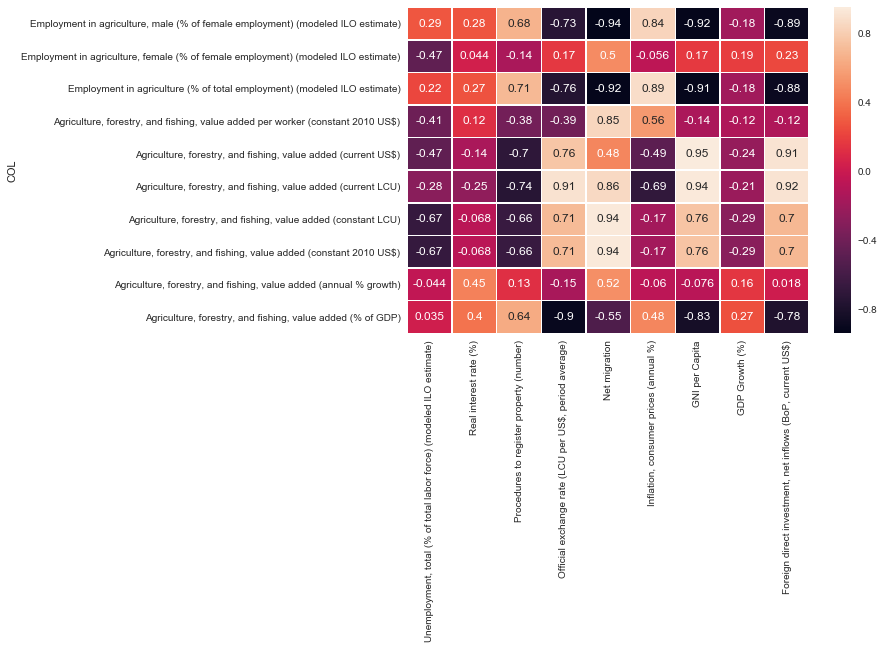

In [2391]:
visualize(crosscorrs(countries.iloc[8][0]))

Just like there's potentially 32 DataFrames, we can also create 32 of these.

Again, proof:

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


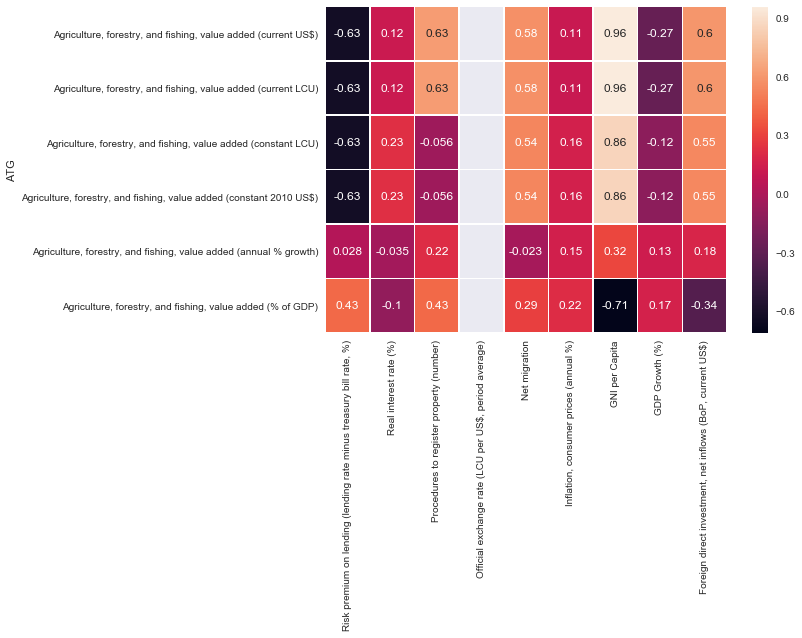

In [2392]:
visualize(crosscorrs(countries.iloc[0][0]))

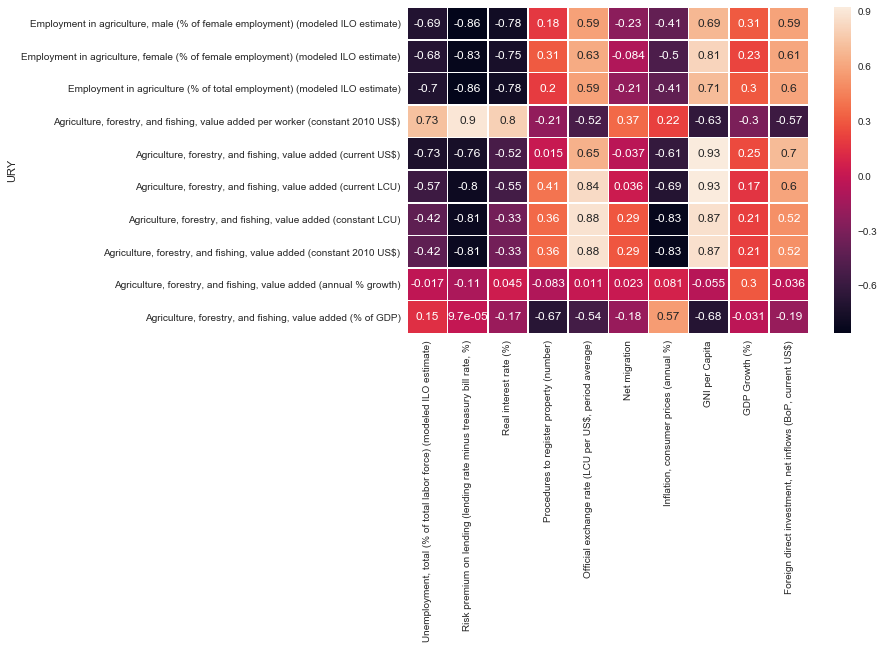

In [2393]:
visualize(crosscorrs(countries.iloc[31][0]))

As mentioned, ATG pegged their currency to the U.S. Dollar. Guess that broke the correlation statement. No worries – we will deal with it later.

Overall, it seems like Agriculture Employment is negatively correlated with Unemployment and Interest Rates. This makes macroeconomic theoretical sense: when the economy is going better, it usually diversifies away from primary sectors such as agriculture!

## Let's find the average of each indicator pair so that we can conclude which factors are most correlated.

#### Start by creating an empty Master DataFrame (master_df) with row labels = macro_indicators and columns labels = agro_indicators. We do this using some funky list magic:

We create a nested list master_list holding all possible correlation pairs:

In [2394]:
master_list = []

for i in list(indicators_macro.values()):
    master_list.append([i])
    idx = master_list.index([i])
    
    for j in list(indicators_agro.values()):
        master_list[idx].append(j)

master_list

[['GNI per Capita',
  'Agriculture, forestry, and fishing, value added (% of GDP)',
  'Agriculture, forestry, and fishing, value added (annual % growth)',
  'Agriculture, forestry, and fishing, value added (constant 2010 US$)',
  'Agriculture, forestry, and fishing, value added (constant LCU)',
  'Agriculture, forestry, and fishing, value added (current LCU)',
  'Agriculture, forestry, and fishing, value added (current US$)',
  'Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)',
  'Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
  'Child employment in agriculture (% of economically active children ages 7-14)',
  'Child employment in agriculture, female (% of female economically active children ages 7-14)',
  'Child employment in agriculture, male (% of male economically active children ages 7-14)',
  'Employment in agriculture (% of total employment) (modeled ILO estimate)',
  'Employment in agriculture, female (% of female 

And now we turn the nested list into a DataFrame. We also make the cells empty – or, well, fully populate them by zeroes:

In [2395]:
master_df = pd.DataFrame(master_list)
master_df = dfc.set_index(master_df.pop(0))
master_df.columns = (list(master_df.iloc[0]))

idx = len(indicators_macro) - 1

while idx > -1:
    master_df.iloc[idx] = 0
    idx -= 1
    
master_df

,"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2010 US$)","Agriculture, forestry, and fishing, value added (constant LCU)","Agriculture, forestry, and fishing, value added (current LCU)","Agriculture, forestry, and fishing, value added (current US$)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)","Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",Child employment in agriculture (% of economically active children ages 7-14),"Child employment in agriculture, female (% of female economically active children ages 7-14)","Child employment in agriculture, male (% of male economically active children ages 7-14)",Employment in agriculture (% of total employment) (modeled ILO estimate),"Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of female employment) (modeled ILO estimate)"
0,,,,,,,,,,,,,,
GNI per Capita,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GDP Growth (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Foreign direct investment, net inflows (BoP, current US$)",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Inflation, consumer prices (annual %)",0,0,0,0,0,0,0,0,0,0,0,0,0,0
Real interest rate (%),0,0,0,0,0,0,0,0,0,0,0,0,0,0
Net migration,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Official exchange rate (LCU per US$, period average)",0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Unemployment, total (% of total labor force) (modeled ILO estimate)",0,0,0,0,0,0,0,0,0,0,0,0,0,0
Procedures to register property (number),0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Now comes the meat of filling in the correlations for each [macro, agro] pair. 

### Essentially, we create a DataFrame of each country's correlations, and then add the cells from those DataFrames ('current') to the corresponding cell in the Master DataFrame (master_df) we just created.

The end goal is to find the average, and to find the average, we need to keep track of the number of times we added something to the cell ('n'). *n* is not the same for each cell because some countries have more data than others. Instead of creating yet another variable to keep track of this, we cheat by adding 1000 to the correlations, essentially tracking *n* in the first digit or two of the cells. On the way we also remove any NaN values.

Note: this takes a while to run and is wasteful computationally, but it was the best way we found to do this given our data structures.

In [2396]:
jdx = countries.shape[0] - 1

while jdx > -1:
    current = crosscorrs(countries.iloc[jdx][0])
    current = current.fillna(0, downcast='infer')
    print('country ' + str(jdx)) #since it takes so long, we want to make sure it's actually running!

    for row in current.iterrows():
        idx = 0

        while idx < len(row[1]):
            if np.isnan(master_df.loc[list(row[1].index)[idx]][row[1].name]) == False:
                master_df.loc[list(row[1].index)[idx]][row[1].name] = master_df.loc[list(row[1].index)[idx]][row[1].name] + row[1][idx] + 1000
            else:
                print('NaN')
            idx += 1

    jdx -= 1

country 31


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


country 30
country 29
country 28
country 27
country 26
country 25
country 24
country 23
country 22
country 21
country 20
country 19
country 18
country 17
country 16
country 15
country 14
country 13
country 12
country 11
country 10
country 9
country 8
country 7
country 6
country 5
country 4
country 3
country 2
country 1
country 0


#### And here's the DataFrame of correlations...plus the temporary math stuff:

In [2397]:
master_df

,"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2010 US$)","Agriculture, forestry, and fishing, value added (constant LCU)","Agriculture, forestry, and fishing, value added (current LCU)","Agriculture, forestry, and fishing, value added (current US$)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)","Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",Child employment in agriculture (% of economically active children ages 7-14),"Child employment in agriculture, female (% of female economically active children ages 7-14)","Child employment in agriculture, male (% of male economically active children ages 7-14)",Employment in agriculture (% of total employment) (modeled ILO estimate),"Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of female employment) (modeled ILO estimate)"
0,,,,,,,,,,,,,,
GNI per Capita,27980.9,27999.8,28015.2,28015.2,28023.7,28023.3,25010.1,0,0,0,0,24982.2,24988.4,24983
GDP Growth (%),28003,28010.2,28000.4,28000.4,27999.1,27998.5,24998.3,0,0,0,0,25001.6,25002.5,25001.7
"Foreign direct investment, net inflows (BoP, current US$)",26985.6,27000.8,27013.6,27013.6,27017.6,27017.4,24008.4,0,0,0,0,23987.2,23992.4,23987.9
"Inflation, consumer prices (annual %)",26006.7,25999.1,25996.6,25996.6,25991.9,25993.6,22997.1,0,0,0,0,23007.5,23004.4,23007.7
Real interest rate (%),26000.9,26000.5,25997.3,25997.3,25995.8,25996.2,23000.4,0,0,0,0,23002.8,23000.7,23003.3
Net migration,27003.3,27000.4,27002.2,27002.2,27002.7,27001,25003.5,0,0,0,0,24996.8,24999.8,24996.6
"Official exchange rate (LCU per US$, period average)",27988.6,27999.7,28014.1,28014.1,28016,28013.2,25005,0,0,0,0,24991.9,24995.3,24992.7
"Unemployment, total (% of total labor force) (modeled ILO estimate)",25005.9,25000.1,24997.9,24997.9,24994.9,24994.6,24998,0,0,0,0,25006.2,25003.2,25005.4
Procedures to register property (number),24002.3,24000.7,23999.7,23999.7,24000.4,23999.8,20999.9,0,0,0,0,21000.4,20999.9,21000.7


Due to the funky list magic earlier, the dtype of the cells is 'object'. Let's change this to numeric so we can use math to convert the sum of correlations + (number of correlations * 1000) into the average.

In [2398]:
master_df.dtypes

Agriculture, forestry, and fishing, value added (% of GDP)                                      object
Agriculture, forestry, and fishing, value added (annual % growth)                               object
Agriculture, forestry, and fishing, value added (constant 2010 US$)                             object
Agriculture, forestry, and fishing, value added (constant LCU)                                  object
Agriculture, forestry, and fishing, value added (current LCU)                                   object
Agriculture, forestry, and fishing, value added (current US$)                                   object
Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)                  object
Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)                   object
Child employment in agriculture (% of economically active children ages 7-14)                   object
Child employment in agriculture, female (% of female economically active 

In [2399]:
cols = master_df.columns[master_df.dtypes.eq(object)]
master_df[cols] = master_df[cols].apply(pd.to_numeric, errors='coerce', axis=0)
master_df

,"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2010 US$)","Agriculture, forestry, and fishing, value added (constant LCU)","Agriculture, forestry, and fishing, value added (current LCU)","Agriculture, forestry, and fishing, value added (current US$)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)","Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",Child employment in agriculture (% of economically active children ages 7-14),"Child employment in agriculture, female (% of female economically active children ages 7-14)","Child employment in agriculture, male (% of male economically active children ages 7-14)",Employment in agriculture (% of total employment) (modeled ILO estimate),"Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of female employment) (modeled ILO estimate)"
0,,,,,,,,,,,,,,
GNI per Capita,27980.897705,27999.812038,28015.246316,28015.246316,28023.704389,28023.288998,25010.118222,0,0,0,0,24982.168564,24988.369046,24982.970098
GDP Growth (%),28002.997914,28010.156111,28000.421151,28000.421151,27999.090712,27998.466623,24998.276071,0,0,0,0,25001.615003,25002.518040,25001.747003
"Foreign direct investment, net inflows (BoP, current US$)",26985.589688,27000.773057,27013.641153,27013.641153,27017.646735,27017.389207,24008.441501,0,0,0,0,23987.170605,23992.391321,23987.915255
"Inflation, consumer prices (annual %)",26006.749178,25999.051251,25996.643712,25996.643712,25991.919194,25993.556043,22997.095518,0,0,0,0,23007.528088,23004.397623,23007.735882
Real interest rate (%),26000.894821,26000.528003,25997.278847,25997.278847,25995.777556,25996.222974,23000.444735,0,0,0,0,23002.848056,23000.723971,23003.299998
Net migration,27003.272516,27000.350580,27002.226590,27002.226590,27002.725757,27001.033892,25003.478462,0,0,0,0,24996.790116,24999.755643,24996.554400
"Official exchange rate (LCU per US$, period average)",27988.596030,27999.676339,28014.143081,28014.143081,28016.018364,28013.203220,25004.966460,0,0,0,0,24991.918679,24995.256916,24992.720445
"Unemployment, total (% of total labor force) (modeled ILO estimate)",25005.906204,25000.093049,24997.881130,24997.881130,24994.939869,24994.642150,24998.013871,0,0,0,0,25006.161817,25003.234999,25005.388561
Procedures to register property (number),24002.324599,24000.653400,23999.727340,23999.727340,24000.380444,23999.817532,20999.853827,0,0,0,0,21000.414978,20999.872816,21000.661264


#### An explanation of the below math. 

The first two digits 'store' the number of times we added a value to a cell. We access these through (round(x / 1000)), so e.g. round(27980.9) / 1000 returns 28, meaning we added 28 correlations to that cell.

All we have to do is subtract 28,000 from the total and then divide that by 28 to get the average!

In [2400]:
x = 27980.9
x = (x - (round(x / 1000) * 1000)) / (round(x / 1000))
x

-0.6821428571428052

Let's implement this:

In [2401]:
idx = len(indicators_macro) - 1

while idx > -1:
    master_df.iloc[idx] = (master_df.iloc[idx] - (round(master_df.iloc[idx] / 1000) * 1000)) / (round(master_df.iloc[idx] / 1000))
    idx -= 1

In [2402]:
master_df

,"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2010 US$)","Agriculture, forestry, and fishing, value added (constant LCU)","Agriculture, forestry, and fishing, value added (current LCU)","Agriculture, forestry, and fishing, value added (current US$)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)","Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)",Child employment in agriculture (% of economically active children ages 7-14),"Child employment in agriculture, female (% of female economically active children ages 7-14)","Child employment in agriculture, male (% of male economically active children ages 7-14)",Employment in agriculture (% of total employment) (modeled ILO estimate),"Employment in agriculture, female (% of female employment) (modeled ILO estimate)","Employment in agriculture, male (% of female employment) (modeled ILO estimate)"
0,,,,,,,,,,,,,,
GNI per Capita,-0.682225,-0.006713,0.544511,0.544511,0.846585,0.831750,0.404729,NaN,NaN,NaN,NaN,-0.713257,-0.465238,-0.681196
GDP Growth (%),0.107068,0.362718,0.015041,0.015041,-0.032475,-0.054763,-0.068957,NaN,NaN,NaN,NaN,0.064600,0.100722,0.069880
"Foreign direct investment, net inflows (BoP, current US$)",-0.533715,0.028632,0.505228,0.505228,0.653583,0.644045,0.351729,NaN,NaN,NaN,NaN,-0.534558,-0.317028,-0.503531
"Inflation, consumer prices (annual %)",0.259584,-0.036490,-0.129088,-0.129088,-0.310800,-0.247845,-0.126282,NaN,NaN,NaN,NaN,0.327308,0.191201,0.336343
Real interest rate (%),0.034416,0.020308,-0.104660,-0.104660,-0.162402,-0.145270,0.019336,NaN,NaN,NaN,NaN,0.123829,0.031477,0.143478
Net migration,0.121204,0.012984,0.082466,0.082466,0.100954,0.038292,0.139138,NaN,NaN,NaN,NaN,-0.128395,-0.009774,-0.137824
"Official exchange rate (LCU per US$, period average)",-0.407285,-0.011559,0.505110,0.505110,0.572084,0.471544,0.198658,NaN,NaN,NaN,NaN,-0.323253,-0.189723,-0.291182
"Unemployment, total (% of total labor force) (modeled ILO estimate)",0.236248,0.003722,-0.084755,-0.084755,-0.202405,-0.214314,-0.079445,NaN,NaN,NaN,NaN,0.246473,0.129400,0.215542
Procedures to register property (number),0.096858,0.027225,-0.011361,-0.011361,0.015852,-0.007603,-0.006961,NaN,NaN,NaN,NaN,0.019761,-0.006056,0.031489


## Finally here is what we were ultimately looking for; the end goal of the project: the correlations of each [Agro, Macro] pair.



### Now we can draw tons of conclusions at once, instead of fishing in the dark for correlations!

In [2403]:
master_df.index.name = 'Macroeconomic Indicators'

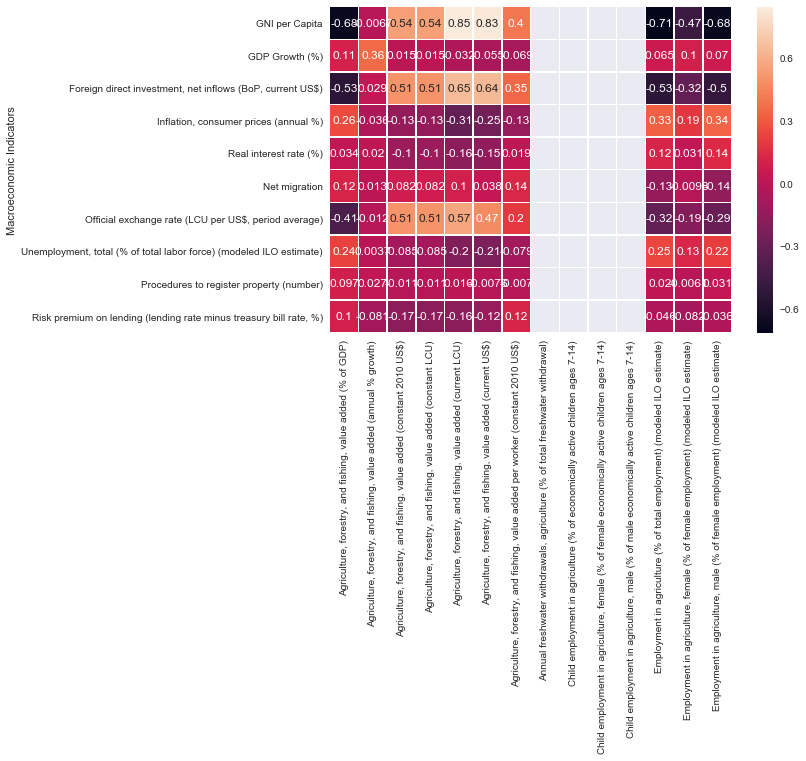

In [2404]:
visualize(master_df)

Finally, this last graph summarizes our conclusions by illustrating the total average corralations for all countries. 

As we see in the graph, on the vertical axis we have different macroeconomics topics while in our horizontal axis we have the agriculture factors we wanted to analyze. 

This graph demonstrates which economic factors have a positive or negative impact on the different agriculture factors. For example, the Gross National Income (GNI) per capita is highly negative corralated to the percentage of total employement in agriculture while it is highly correlated to the total amount of current USD. 

This makes sense by simple logic, as the current amount of USD in the economy rises it should positively impact Gross National Income per capita making it rise as well.